<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/Finetuning_model6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

In [ ]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 6
size = 128

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.3775):
        for i in np.arange(0,int(width/size)+1,0.3775):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data



'''
train_input = np.array(crop(Image.open(file_path + "final_input_train.png")))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(Image.open(file_path + "cleaned_output_train.png")))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(Image.open(file_path + "final_input_test.png")))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(Image.open(file_path + "cleaned_output_test.png")))
print("Done reading the  test output of size = ", test_output.shape)
'''

train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)
#'''

Done reading the  training input of size =  (22484, 128, 128)
Done reading the  training out of size =  (22484, 128, 128)
Done reading the  test input of size =  (9394, 128, 128)
Done reading the  test output of size =  (9394, 128, 128)


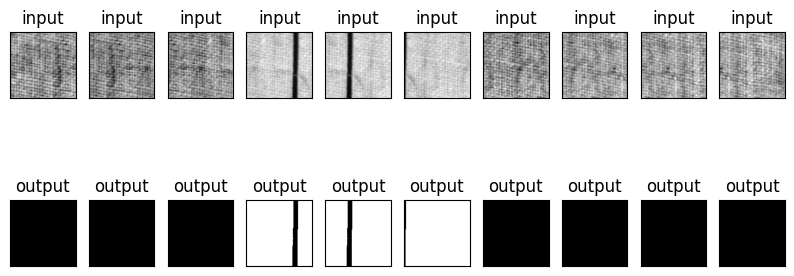

In [ ]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+10]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+10]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [ ]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()



autoencoder.save(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+str(model_number)+'_b'+'.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+str(model_number)+'_b'+'.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

Epoch 1/100
703/703 [==============================] - 20s 13ms/step - loss: 0.0226 - val_loss: 0.0084
Epoch 2/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0110 - val_loss: 0.0078
Epoch 3/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0098 - val_loss: 0.0065
Epoch 4/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 5/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 6/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0080 - val_loss: 0.0063
Epoch 7/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 8/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0071 - val_loss: 0.0051
Epoch 9/100
703/703 [==============================] - 7s 10ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 10/100
703/703 [==============================] - 7s 10ms/step - loss: 0.00

The time of execution of above program is : 722.2403295040131 seconds


# **Fine tuning**

In [1]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

Mounted at /content/drive
'[1] Imagic-  Text-Based Real Image Editing with Diffusion Models .mp4'
'20200904_105320[1].jpg'
'5th Year 1st Sem 1st VIP Progress Report.pdf'
'5th Year 1st Sem 1st VIP Progress Report.pptx'
 6050_XXXXXX5284_HO01190614_20210628.zip
 7008837749.zip
'A0042 ICMIP.gslides'
'[A] 100 DPI non white balanced and bw output'
'AP 165 Camera Obscura.gdoc'
'AP 183 LE1'
 Architectural_designs
'Art and Science - STS Final Report.gdoc'
 autoencoder_6_red_200
 BPI-PHILAM-XXXXXX5284.zip
 Classroom
'CLEAN_[WB] 1872_Mindanao_NAP_D.FedericoCaballero.tif'
'CLEAN_[WB] 1885_Mactan_NAP_FelixPelayo.png'
'CLEAN_[WB] XXXX_Cagayan y Ilocos_online (1).png'
'CLEAN_[WB] XXXX_Cagayan y Ilocos_online.png'
'Colab Notebooks'
'Continuous RV Probability Distributions (Annotated).pptx'
'Copy of Addition of Vectors.pdf'
'Copy of Buoyancy.pdf'
'Copy of Free Fall.pdf'
'Copy of Measurement, Uncertainty, and Deviation.pdf'
'Copy of Measuring Devices.pdf'
'Copy of Physical Pendulum.pdf'
'Copy of Project

In [10]:
import os
from PIL import Image, ImageOps
import numpy as np

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.3775):
        for i in np.arange(0,int(width/size)+1,0.3775):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data

def load_images_from_folder(folder_path, size):
    images = []
    filenames = sorted(os.listdir(folder_path))
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            im = ImageOps.grayscale(Image.open(img_path))
            images.extend(crop(im))
    return np.array(images)

input_folder_path = file_path+"7 Fine tuning/input"
output_folder_path = file_path+"7 Fine tuning/output"
size = 128

# Load input and output images
train_input = load_images_from_folder(input_folder_path, size)
train_output = load_images_from_folder(output_folder_path, size)

print("Done reading the training input of size:", train_input.shape)
print("Done reading the training output of size:", train_output.shape)


Done reading the training input of size: (8592, 128, 128)
Done reading the training output of size: (8592, 128, 128)


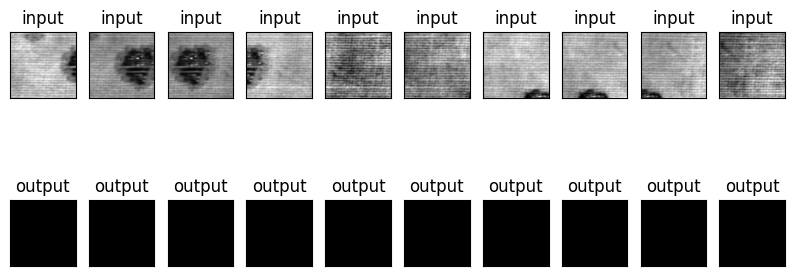

In [14]:
import matplotlib.pyplot as plt
N = 0
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+N]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+N]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [ ]:
start = time.time()
import tensorflow as tf
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import load_model

model_number = 6
# Load your saved model
autoencoder = load_model(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

# Freeze layers to prevent retraining
for layer in autoencoder.layers:
    layer.trainable = False

# Create new input and output data
new_train_input, new_train_output = load_new_data()

# Compile the model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Fine-tune the model
fine_tune_history = autoencoder.fit(new_train_input, new_train_output,
                                     epochs=fine_tune_epochs,
                                     shuffle=True,
                                     validation_data=(test_input, test_output))

# Save the fine-tuned model
autoencoder.save(file_path + '7 Fine tuning/' + 'autoencoder_fine_tuned_'+str(model_number))

# Save the fine-tune history
fine_tune_loss = fine_tune_history.history['loss']
fine_tune_loss_df = pd.DataFrame(fine_tune_loss)
fine_tune_loss_df.to_csv(file_path + '7 Fine tuning/' + 'fine_tune_loss_'+str(model_number)+'.csv')

fine_tune_val_loss = fine_tune_history.history['val_loss']
fine_tune_val_loss_df = pd.DataFrame(fine_tune_val_loss)
fine_tune_val_loss_df.to_csv(file_path + '7 Fine tuning/' +'fine_tune_val_loss_'+str(model_number)+'.csv')

# Record end time
end = time.time()

print("The time of execution of the fine-tuning program is:", (end - start), "seconds")